<a href="https://colab.research.google.com/github/bolinfel/IA-Aplicada/blob/main/IA_Aula_6_Metodos_de_busca_exemplo_A_estrela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

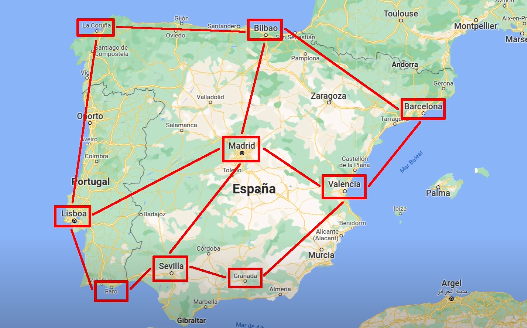

In [ ]:
#Exemplo de estrutura de dados para busca em gráficos

In [ ]:
# Classe Ação, que representa uma ação (movimento) no problema.
class Acao:

  def __init__(self, nome):
    # Nome da ação (ex: 'norte', 'sul', etc.)
    self.nome = nome

  def __str__(self):
    # Representação da ação em formato de string
    return self.nome

In [ ]:
# Classe Estado, que representa um estado no problema.
class Estado:

  def __init__(self, nome, acoes):
    # Nome do estado e suas possíveis ações
    self.nome = nome
    self.acoes = acoes

  def __str__(self):
    # Representação do estado em formato de string
    return self.nome

In [ ]:
# Classe Problema, que define o problema de busca.
class Problema:

  def __init__(self, estado_inicial, estados_objetivos, acoes, custos=None, heuristicas=None):
    # Estado inicial, estados objetivos, e as ações que são possíveis a partir de cada estado.
    self.estado_inicial = estado_inicial
    self.estados_objetivos = estados_objetivos
    self.acoes = acoes
    # Dicionário de custos e heurísticas (pode ser passado ou calculado automaticamente).
    self.custos = custos
    self.heuristicas = heuristicas if heuristicas else {}
    self.infinito = 999999  # Usado para representar um custo muito alto.

    # Se os custos não forem fornecidos, eles serão atribuídos como 1 para todas as ações.
    if not self.custos:
      self.custos = {}
      for estado in self.acoes.keys():
        self.custos[estado] = {}
        for acao in self.acoes[estado].keys():
          self.custos[estado][acao] = 1

  def __str__(self):
    # Mostra o estado inicial e os objetivos do problema.
    msg = "Estado Inicial: {0} -> Objetivos: {1}"
    return msg.format(self.estado_inicial.nome, self.estados_objetivos)

  # Verifica se um estado é o estado objetivo.
  def e_objetivo(self, estado):
    return estado in self.estados_objetivos

  # Retorna o estado resultante de uma ação a partir de um estado.
  def resultado(self, estado, acao):
    if estado.nome not in self.acoes.keys():
      return None
    acoes_estado = self.acoes[estado.nome]
    if acao.nome not in acoes_estado.keys():
      return None
    return acoes_estado[acao.nome]

  # Retorna o custo de realizar uma ação a partir de um estado.
  def custo_acao(self, estado, acao):
    if estado.nome not in self.custos.keys():
      return self.infinito
    custos_estado = self.custos[estado.nome]
    if acao.nome not in custos_estado.keys():
      return self.infinito
    return custos_estado[acao.nome]

  # Calcula o custo total do caminho (usado na função A* para o valor 'g').
  def custo_caminho(self, no):
    total = 0
    while no.pai:
      total += self.custo_acao(no.pai.estado, no.acao)
      no = no.pai
    return total

  # Retorna a heurística do estado (usada na função A* para o valor 'h').
  def heuristica(self, estado):
    return self.heuristicas.get(estado.nome, 0)  # Se não houver heurística, retorna 0.

In [ ]:
# Classe Nó, que representa um nó na árvore de busca.
class No:

  def __init__(self, estado, acao=None, acoes=None, pai=None):
    # Estado atual, ação que levou a esse estado, ações possíveis, e nó pai.
    self.estado = estado
    self.acao = acao
    self.acoes = acoes
    self.pai = pai
    self.filhos = []
    self.custo = 0  # Custo acumulado até este nó.

  def __str__(self):
    # Representação do nó (apenas o nome do estado).
    return self.estado.nome

  # Expande o nó atual gerando seus filhos.
  def expandir(self, problema):
    self.filhos = []
    if not self.acoes:
      if self.estado.nome not in problema.acoes.keys():
        return self.filhos
      self.acoes = problema.acoes[self.estado.nome]
    # Para cada ação, cria um novo nó filho.
    for acao in self.acoes.keys():
      acao_filho = Acao(acao)
      novo_estado = problema.resultado(self.estado, acao_filho)
      acoes_novo = {}
      if novo_estado.nome in problema.acoes.keys():
        acoes_novo = problema.acoes[novo_estado.nome]
        filho = No(novo_estado, acao_filho, acoes_novo, self)
        custo = self.pai.custo if self.pai else 0
        custo += problema.custo_acao(self.estado, acao_filho)
        filho.custo = custo
        self.filhos.append(filho)
    return self.filhos

In [ ]:
# Função para criar o nó raiz a partir do estado inicial.
def cria_no_raiz(problema):
  estado_raiz = problema.estado_inicial
  acoes_raiz = {}
  if estado_raiz.nome in problema.acoes.keys():
    acoes_raiz = problema.acoes[estado_raiz.nome]
    raiz = No(estado_raiz, None, acoes_raiz, None)
  return raiz

# Função para mostrar a solução (sequência de estados e ações).
def mostra_solucao(objetivo = None):
  if not objetivo:
    print("Não há solução")
    return

  no = objetivo
  total_custo = 0  # Para acumular o custo total da viagem

  # Caminha de trás para frente, imprimindo cada estado e ação
  while no:
    msg = "Estado: {0}"
    print(msg.format(no.estado.nome))

    if no.acao:
      msg = "<...{0}..."
      print(msg.format(no.acao.nome))
      # Calcula o custo a partir do nó pai
      total_custo += no.pai.custo if no.pai else 0

    no = no.pai

  # Mostra o custo total da viagem
  print(f"Custo total da viagem: {total_custo}")

In [ ]:
# Função de Busca A*.
def busca_a_estrela(problema):
  # Inicializa a fronteira com o nó raiz (estado inicial).
  raiz = cria_no_raiz(problema)
  fronteira = [(raiz, 0)]  # Lista de tuplas (nó, custo f = g + h).
  explorados = set()

  while fronteira:
    # Ordena a fronteira pela função f (g + h).
    fronteira.sort(key=lambda x: x[1])
    no_atual, _ = fronteira.pop(0)

    # Se o estado atual for objetivo, retorna o nó.
    if problema.e_objetivo(no_atual.estado):
      return no_atual

    explorados.add(no_atual.estado)

    # Expande o nó atual gerando seus filhos.
    for filho in no_atual.expandir(problema):
      if filho.estado not in explorados:
        custo_g = problema.custo_caminho(filho)  # Custo do caminho até o nó.
        custo_h = problema.heuristica(filho.estado)  # Heurística do nó.
        custo_f = custo_g + custo_h  # Função f = g + h.
        fronteira.append((filho, custo_f))  # Adiciona o filho à fronteira.

  return None  # Retorna None se não houver solução.

In [ ]:
# Definições (exemplo de um problema de busca com cidades).
if __name__ == '__main__':
  # Definição das ações possíveis (movimentos entre as cidades).
  accN = Acao('norte')
  accS = Acao('sul')
  accL = Acao('leste')
  accO = Acao('oeste')

  # Definição dos estados (cidades).
  coruna = Estado('A Coruña', [accS, accL])
  bilbao = Estado('Bilbao', [accS, accL, accO])
  barcelona = Estado('Barcelona', [accS, accO])
  lisboa = Estado('Lisboa', [accN, accS, accL])
  madrid = Estado('Madrid', [accN, accS, accL, accO])
  valencia = Estado('Valencia', [accN, accS, accO])
  faro = Estado('Faro', [accN, accL])
  sevilla = Estado('Sevilla', [accN, accL, accO])
  granada = Estado('Granada', [accN, accO])

  # Mapa de ações (possíveis viagens entre as cidades).
  viagens = {
    'A Coruña': {'sul': lisboa, 'leste': bilbao},
    'Bilbao': {'sul': madrid, 'leste': barcelona, 'oeste': coruna},
    'Barcelona': {'sul': valencia, 'oeste': coruna},
    'Lisboa': {'norte': coruna, 'sul': faro, 'leste': madrid},
    'Madrid': {'norte': bilbao, 'sul': sevilla, 'leste': valencia, 'oeste': lisboa},
    'Valencia': {'norte': barcelona, 'sul': granada, 'oeste': madrid},
    'Faro': {'norte': lisboa, 'leste': sevilla},
    'Sevilla': {'norte': madrid, 'leste': granada, 'oeste': faro},
    'Granada': {'norte': valencia, 'oeste': sevilla}
  }

  # Dicionário de custos entre as cidades.
  kms = {
    'A Coruña': {'sul': 608, 'leste': 545},
    'Bilbao': {'sul': 408, 'leste': 613, 'oeste': 545},
    'Barcelona': {'sul': 350, 'oeste': 613},
    'Lisboa': {'norte': 608, 'sul': 278, 'leste': 624},
    'Madrid': {'norte': 408, 'sul': 534, 'leste': 357, 'oeste': 624},
    'Valencia': {'norte': 350, 'sul': 487, 'oeste': 357},
    'Faro': {'norte': 278, 'leste': 200},
    'Sevilla': {'norte': 534, 'leste': 252, 'oeste': 200},
    'Granada': {'norte': 487, 'oeste': 252}
  }

  # Heurísticas para cada cidade (valores coletados).
  heuristicas = {
    'A Coruña': 100,
    'Bilbao': 101,
    'Barcelona': 102,
    'Lisboa': 100,
    'Madrid': 102,
    'Valencia': 105,
    'Faro': 103,
    'Sevilla': 100,
    'Granada': 10000
  }

Fazendo a chamada do problema e definindo o objetivo

In [ ]:
  # Definição do problema: estado inicial é Faro, objetivo é Barcelona.
  objetivo = [barcelona]
  problema = Problema(faro, objetivo, viagens, custos=kms, heuristicas=heuristicas)

  # Execução da busca A*.
  solucao = busca_a_estrela(problema)
  mostra_solucao(solucao)

Estado: Barcelona
<...norte...
Estado: Valencia
<...leste...
Estado: Madrid
<...norte...
Estado: Sevilla
<...leste...
Estado: Faro
Custo total da viagem: 1291
